In [50]:
import sys
import pathlib

root = str(pathlib.Path().cwd().parent)
if root not in sys.path:
    sys.path.append(root)

In [51]:
import io
import math
import os

import atproto
import dotenv
import numpy as np

from generators import RGBGenerator, HSVGenerator, CIELChGenerator
from layers.constants import (
    DEFAULT_SIZE,
    DEFAULT_NONE_COLOUR,
)
from layers.canvas import CanvasLayer
from layers.text import (
    NameTextLayer,
    HexcodeTextLayer,
)
from layers.space import SpaceIconLayer, SwatchLayer
from layers.utils import compile_layers
from models.colour import Colour

dotenv.load_dotenv()

True

In [52]:
USERNAME = os.getenv('ATPROTO_CLIENT_USERNAME')
PASSWORD = os.getenv('ATPROTO_CLIENT_PASSWORD')

In [53]:
colour = CIELChGenerator().generate(1)

In [54]:
name_layer = NameTextLayer(text=colour.name.upper(), position=(1200 - 120, 1200 - 108*5/6 - 40), anchor='rb')
hexcode_layer = HexcodeTextLayer(text=colour.hexcode, position=(1200 - 120, 1200 - 40), anchor='rb')
canvas_layer = CanvasLayer(rgb=colour.rgb)
icon_layer = SpaceIconLayer(position=(1200 - 84, 1200 - 160))

In [55]:
image = compile_layers(canvas_layer, name_layer, hexcode_layer)
buffer = io.BytesIO()
image.save(buffer, format="PNG")

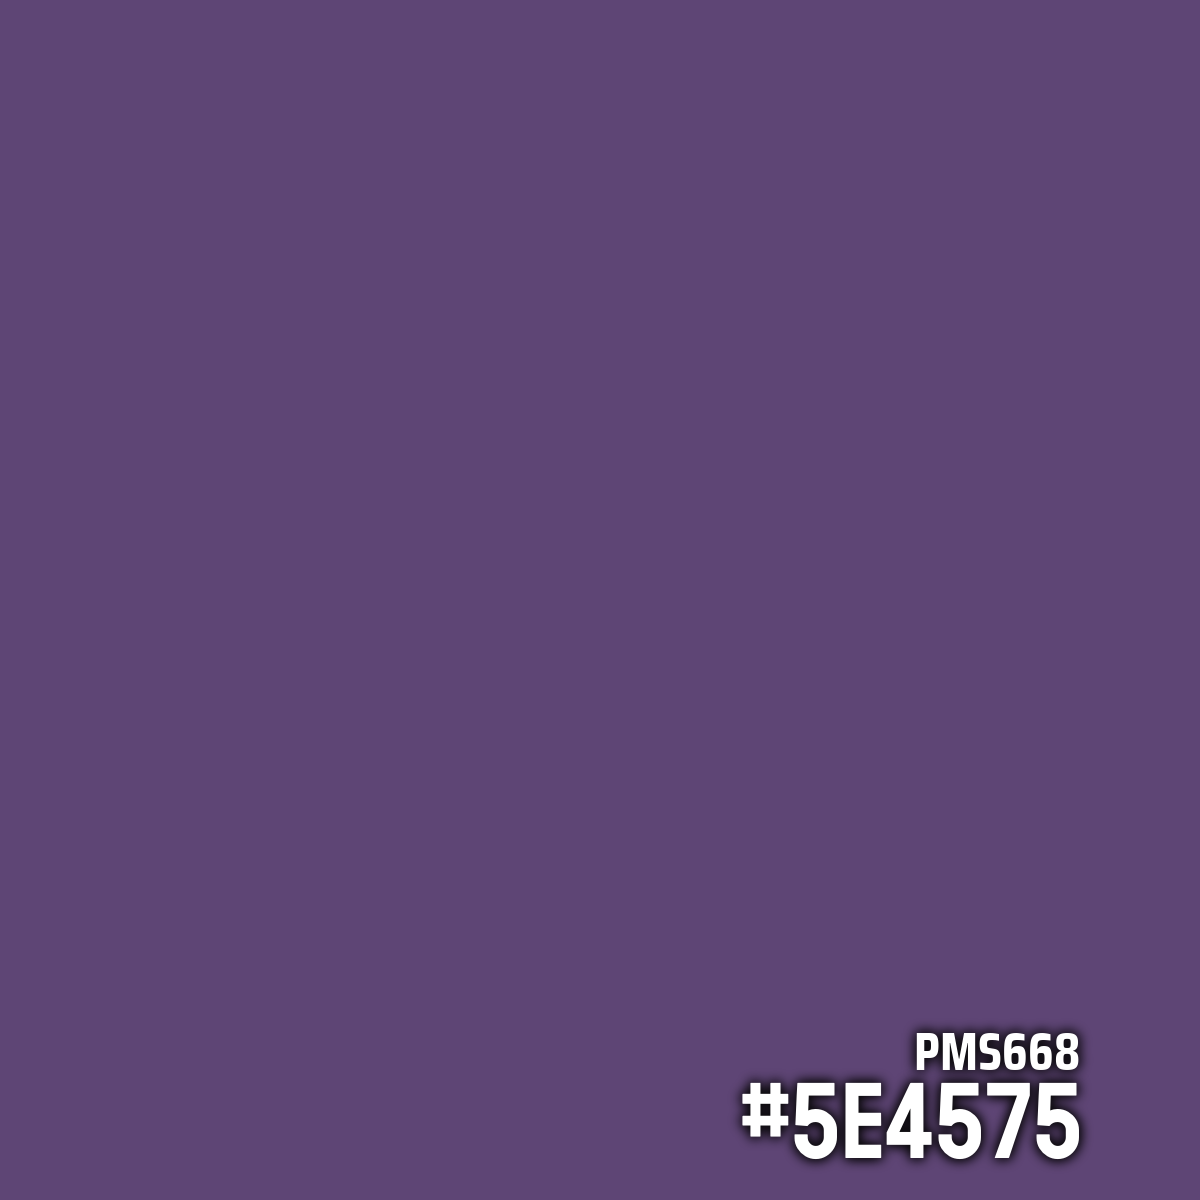

In [56]:
image

In [57]:
# client = atproto.Client()
# client.login(USERNAME, PASSWORD)

# client.send_image("TEST POST", image=buffer.getvalue(), image_alt = f"A picture of the color '{colour.name}'. In the centre of the image is the name and hex code of the color ({colour.hexcode})")